In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# Load the dataset
alzheimers_data = pd.read_csv('alzheimers_processed.csv')

# Remove the 'diagnosis' column
alzheimers_data = alzheimers_data.drop(columns=['Diagnosis'])

# Display the first few rows of the dataframe
alzheimers_data.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,BMI Category
0,16,1.389398,1,-1.474299,1.305314,2,2,1,0,0,...,1,0,1,1,0,1,2,0,1,1
1,0,0.002719,1,-0.432087,0.654689,2,1,0,0,0,...,1,2,2,2,0,0,1,0,1,2
2,14,1.081247,0,1.652339,-0.814465,0,0,1,0,1,...,0,2,0,1,0,1,2,0,0,0
3,4,-1.460997,1,1.304935,0.927532,1,2,2,1,0,...,1,2,1,1,0,0,2,1,0,1
4,17,-1.075808,0,-1.126895,0.675677,0,1,0,1,0,...,2,0,0,0,0,1,2,0,0,1


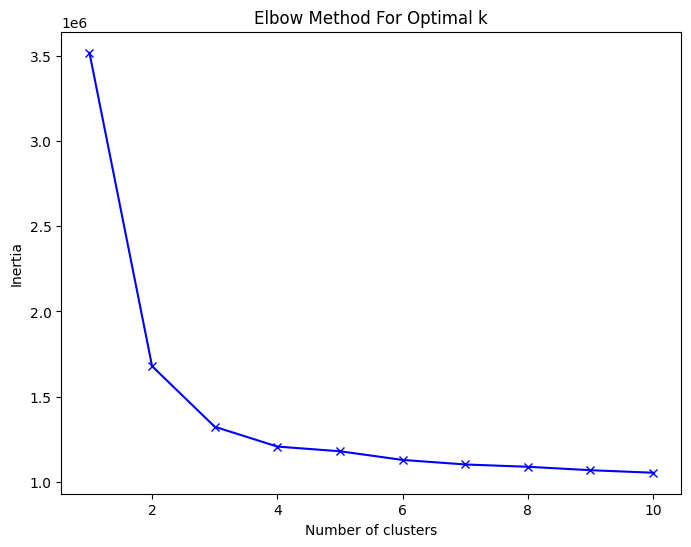

In [3]:
# Elbow method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(alzheimers_data)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [4]:
# KMeans clustering with k=2
kmeans_2 = KMeans(n_clusters=2, random_state=42)
kmeans_2.fit(alzheimers_data)

# Predict the clusters for the features
clusters_2 = kmeans_2.predict(alzheimers_data)

# Add the cluster labels to the dataframe
alzheimers_data['Cluster'] = clusters_2

# Print the first few rows of the dataframe with the cluster labels
alzheimers_data.head(15)

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,BMI Category,Cluster
0,16,1.389398,1,-1.474299,1.305314,2,2,1,0,0,...,0,1,1,0,1,2,0,1,1,0
1,0,0.002719,1,-0.432087,0.654689,2,1,0,0,0,...,2,2,2,0,0,1,0,1,2,1
2,14,1.081247,0,1.652339,-0.814465,0,0,1,0,1,...,2,0,1,0,1,2,0,0,0,0
3,4,-1.460997,1,1.304935,0.927532,1,2,2,1,0,...,2,1,1,0,0,2,1,0,1,1
4,17,-1.075808,0,-1.126895,0.675677,0,1,0,1,0,...,0,0,0,0,1,2,0,0,1,0
5,16,-1.306921,0,-1.300597,1.515193,2,0,0,0,0,...,1,1,0,0,1,2,0,0,1,0
6,15,1.466435,0,1.478637,-0.562610,0,1,1,0,1,...,0,0,2,0,0,1,2,1,0,0
7,4,-0.382469,0,0.262722,-0.667550,1,0,2,0,0,...,1,2,2,0,1,2,0,1,0,1
8,4,0.927171,0,0.262722,-1.003356,0,0,2,0,0,...,0,0,1,0,2,1,1,0,0,1
9,6,0.002719,0,0.262722,1.179387,2,2,1,0,1,...,0,0,1,0,1,1,2,0,1,1
